In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="white", palette="crest")

### Netflix userbase analysis


In [73]:
netflix = pd.read_csv('Netflix Userbase.csv')
netflix.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [79]:
# no null value on the database
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   User ID            2500 non-null   int64         
 1   Subscription Type  2500 non-null   object        
 2   Monthly Revenue    2500 non-null   int64         
 3   Join Date          2500 non-null   datetime64[ns]
 4   Last Payment Date  2500 non-null   datetime64[ns]
 5   Country            2500 non-null   object        
 6   Age                2500 non-null   int64         
 7   Gender             2500 non-null   object        
 8   Device             2500 non-null   object        
 9   Plan Duration      2500 non-null   object        
dtypes: datetime64[ns](2), int64(3), object(5)
memory usage: 195.4+ KB


In [75]:
#adjustment on the columns with datetime type
netflix[['Join Date', 'Last Payment Date']] = netflix[['Join Date', 'Last Payment Date']].apply(lambda x: pd.to_datetime(x, format='%d-%m-%y'))

#Month and Year that the user joined Netflix
netflix['Join_Month'] = netflix['Join Date'].dt.to_period('M')

#Calculation of subscription time in terms of months
netflix['Subscription_time'] = netflix['Last Payment Date'].dt.to_period('M').astype('int64') -\
                               netflix['Join Date'].dt.to_period('M').astype('int64')

As we can see, there is only one Plan Duration to the database. That information won't aggregate any new perspective on this data, so it won't be considered to this analysis.

In [76]:
netflix.nunique()

User ID              2500
Subscription Type       3
Monthly Revenue         6
Join Date             300
Last Payment Date      26
Country                10
Age                    26
Gender                  2
Device                  4
Plan Duration           1
dtype: int64

Even though the cardinality of *`Join Date`* is high, that is not the same to *`Last Payment Date`*. In that case, I need to identify the range from that column.

In [269]:
print('The range of this data is from', netflix['Last Payment Date'].min().strftime('%d-%m-%Y'), 
      'to', 
      netflix['Last Payment Date'].max().strftime('%d-%m-%Y'))

The range of this data is from 10-06-2023 to 15-07-2023


#### Differences on features regarding to multiple features

It will be analyzed users and revenue on the following features:
* Gender
* Devices
* Country
* Subscription Type
* Age range (built on top of _Age_ column)

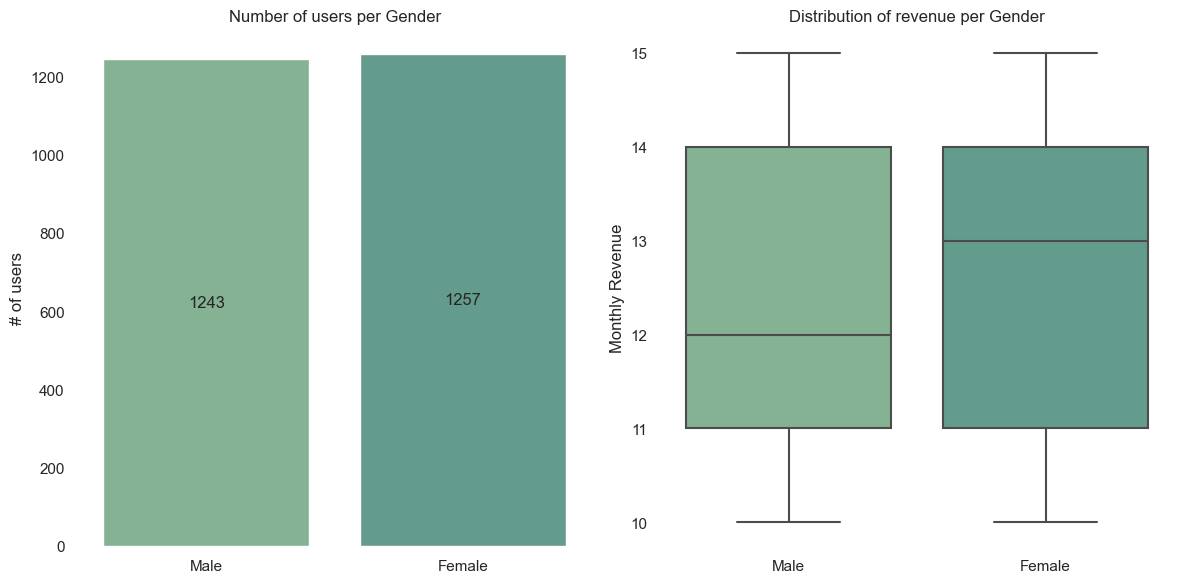

In [209]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(12,6))
sns.countplot(netflix, x='Gender', ax=ax[0])
ax[0].set_ylabel('# of users')
ax[0].set_title('Number of users per Gender')
ax[0].bar_label(ax[0].containers[0], label_type='center')
ax[0].set_xlabel(None)

sns.boxplot(netflix, x='Gender', y='Monthly Revenue', ax=ax[1])
ax[1].set_title('Distribution of revenue per Gender')
ax[1].set_xlabel(None)

sns.despine(fig=fig, left=True, bottom=True)
plt.tight_layout()
plt.show()

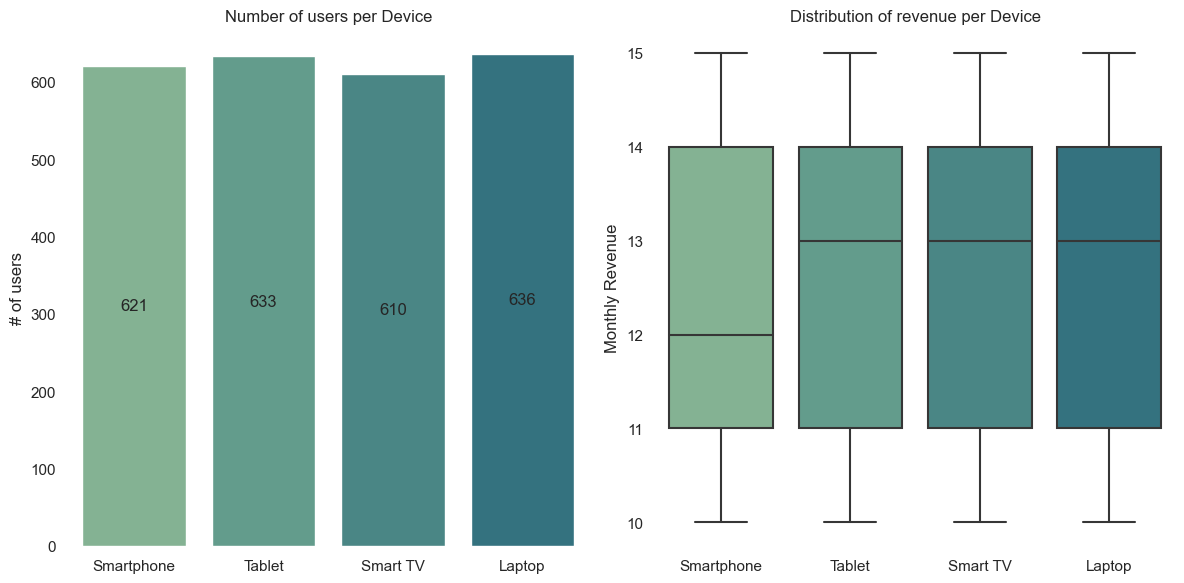

In [208]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(12,6))
sns.countplot(netflix, x='Device', ax=ax[0])
ax[0].set_ylabel('# of users')
ax[0].set_title('Number of users per Device')
ax[0].bar_label(ax[0].containers[0], label_type='center')
ax[0].set_xlabel(None)

sns.boxplot(netflix, x='Device', y='Monthly Revenue', ax=ax[1])
ax[1].set_title('Distribution of revenue per Device')
ax[1].set_xlabel(None)

sns.despine(fig=fig, left=True, bottom=True)
plt.tight_layout()
plt.show()

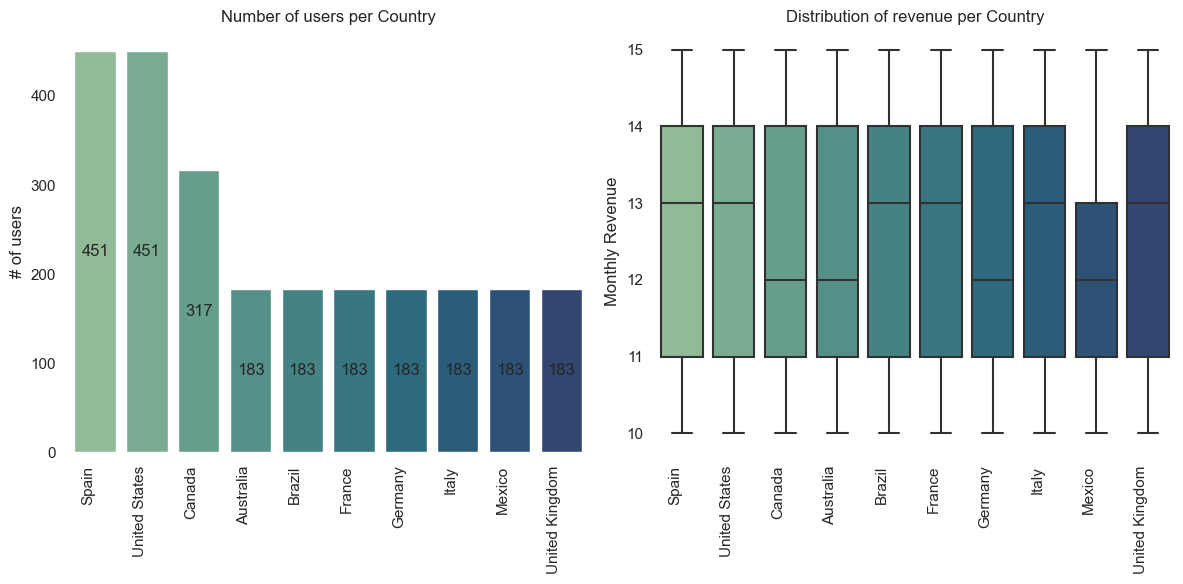

In [227]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(12,6))
sns.countplot(netflix, x='Country', ax=ax[0], 
              order=netflix.groupby('Country')['User ID'].count().sort_values(ascending=False).index, palette='crest')
ax[0].set_xticklabels(labels=ax[0].get_xticklabels(), rotation=90, ha='right')
ax[0].set_ylabel('# of users')
ax[0].set_title('Number of users per Country')
ax[0].bar_label(ax[0].containers[0], label_type='center')
ax[0].set_xlabel(None)

sns.boxplot(netflix, x='Country', y='Monthly Revenue', ax=ax[1], 
            order=netflix.groupby('Country')['User ID'].count().sort_values(ascending=False).index, palette='crest')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90, ha='right')
ax[1].set_title('Distribution of revenue per Country')
ax[1].set_xlabel(None)

sns.despine(fig=fig, left=True, bottom=True)
plt.tight_layout()
plt.show()

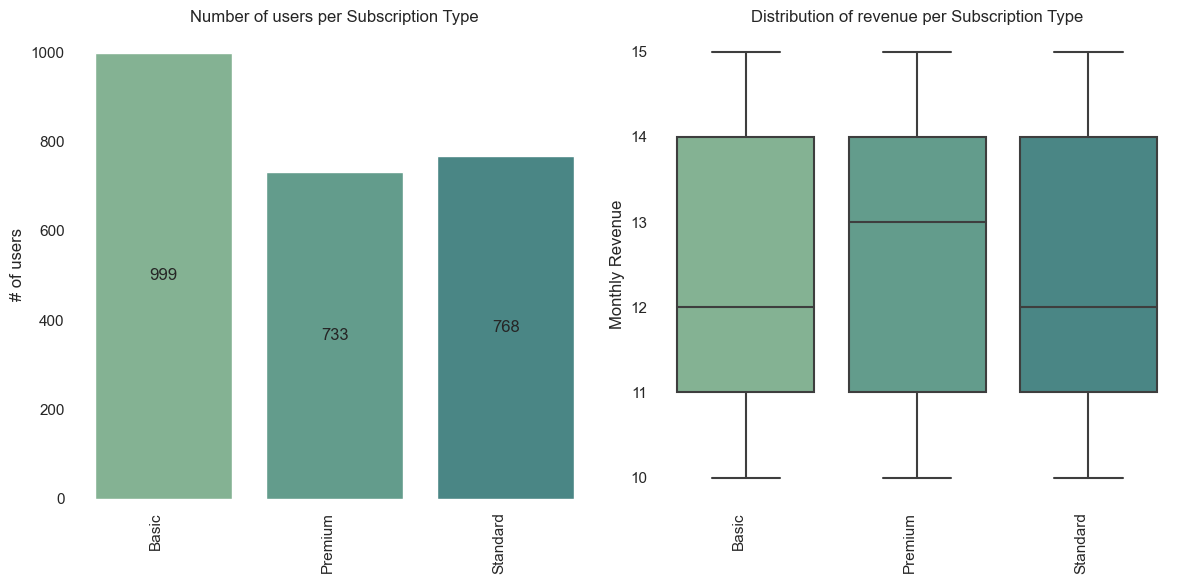

In [229]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(12,6))
sns.countplot(netflix, x='Subscription Type', ax=ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90, ha='right')
ax[0].set_xticklabels(labels=ax[0].get_xticklabels(), rotation=90, ha='right')
ax[0].set_ylabel('# of users')
ax[0].set_title('Number of users per Subscription Type')
ax[0].bar_label(ax[0].containers[0], label_type='center')
ax[0].set_xlabel(None)

sns.boxplot(netflix, x='Subscription Type', y='Monthly Revenue', ax=ax[1])
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90, ha='right')
ax[1].set_title('Distribution of revenue per Subscription Type')
ax[1].set_xlabel(None)

sns.despine(fig=fig, left=True, bottom=True)
plt.tight_layout()
plt.show()

In [91]:
#As the age has a long range of possibilities, I decided to create bins to analyze it
netflix['Aged_binned'] = pd.cut(netflix['Age'], 
                                bins=[-np.inf, 30, 40, 50, np.inf],
                                labels=['<30','31-40','41-50','>51',]
                                )

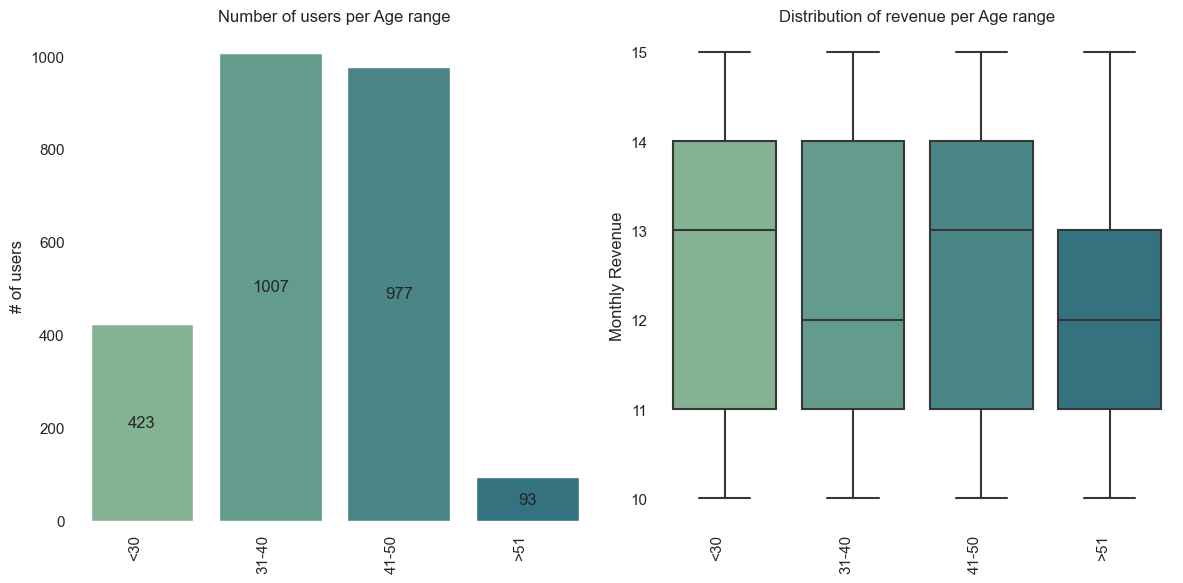

In [230]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(12,6))
sns.countplot(netflix, x='Aged_binned', ax=ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90, ha='right')
ax[0].set_ylabel('# of users')
ax[0].set_title('Number of users per Age range')
ax[0].bar_label(ax[0].containers[0], label_type='center')
ax[0].set_xlabel(None)

sns.boxplot(netflix, x='Aged_binned', y='Monthly Revenue', ax=ax[1])
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90, ha='right')
ax[1].set_title('Distribution of revenue per Age range')
ax[1].set_xlabel(None)

sns.despine(fig=fig, left=True, bottom=True)
plt.tight_layout()
plt.show()

### Understanding Lifetime value of the customer

As before, it will be analyzed the lifetime value (or total revenue) on the following features:
* Country
* Gender

In [220]:
#Definition of Lifetime Value of customers
netflix['ltv'] = netflix['Monthly Revenue']*netflix['Subscription_time']
print(f"Mean value of Lifetime Value from users: {netflix['ltv'].mean()}")

Mean value of Lifetime Value from users: 127.7988


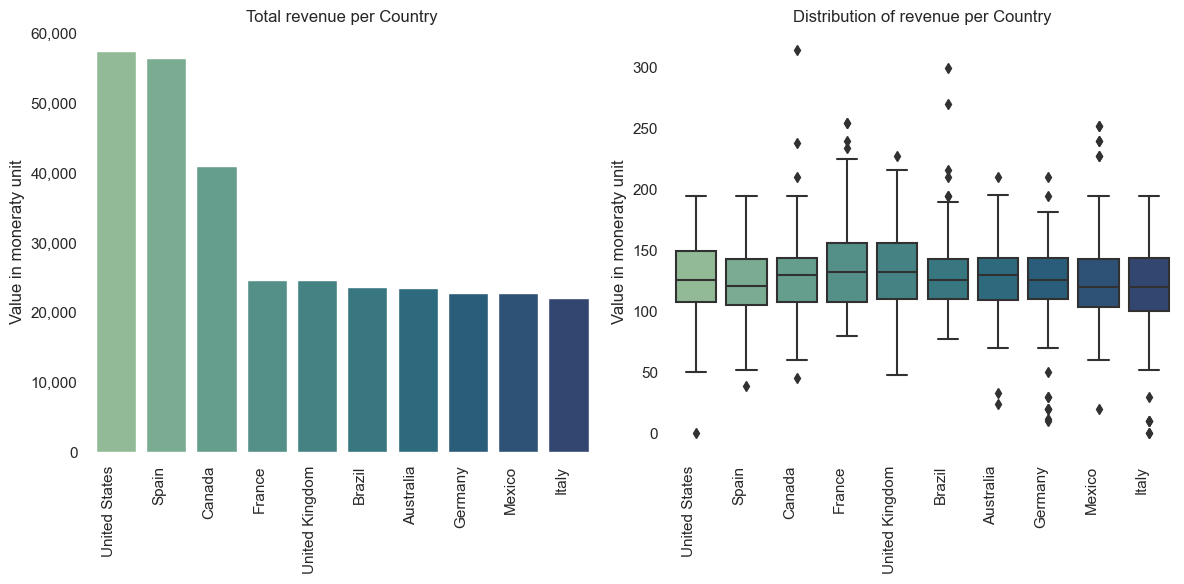

In [270]:
fig, ax = plt.subplots(1,2,figsize=(12,6))
sns.barplot(netflix, x='Country', y='ltv', errorbar=None, estimator='sum', order=netflix.groupby('Country')[['ltv']]\
                                                .sum().reset_index().sort_values('ltv', ascending=False).Country, ax=ax[0], palette='crest')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90, ha='right')
ax[0].yaxis.set_major_formatter('{x:,.0f}')
ax[0].set_ylabel('Value in moneraty unit')
ax[0].set_title('Total revenue per Country')
ax[0].set_xlabel(None)

sns.boxplot(netflix, x='Country', y='ltv', ax=ax[1], order=netflix.groupby('Country')[['ltv']]\
                                                .sum().reset_index().sort_values('ltv', ascending=False).Country, palette='crest')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90, ha='right')
ax[1].set_title('Distribution of revenue per Country')
ax[1].set_ylabel('Value in moneraty unit')
ax[1].set_xlabel(None)

sns.despine(fig=fig, left=True, bottom=True)
plt.tight_layout()
plt.show()

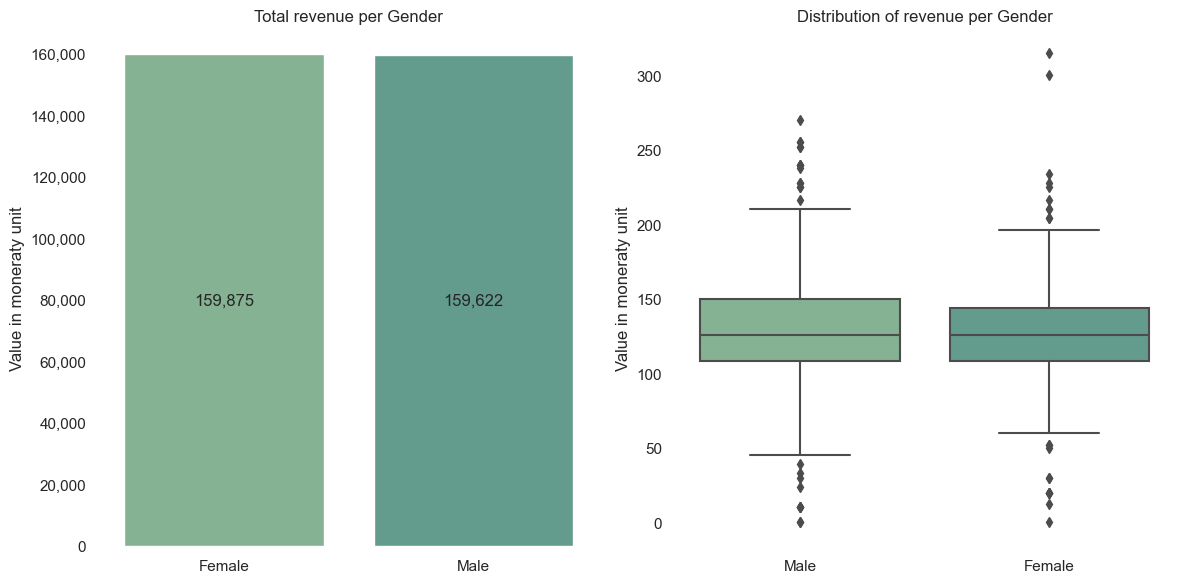

In [271]:
fig, ax = plt.subplots(1,2,figsize=(12,6))
sns.barplot(netflix, x='Gender', y='ltv', estimator='sum', errorbar=None, order=netflix.groupby('Gender')[['ltv']]\
                                                .sum().reset_index().sort_values('ltv', ascending=False).Gender, ax=ax[0])
ax[0].yaxis.set_major_formatter('{x:,.0f}')
ax[0].set_ylabel('Value in moneraty unit')
ax[0].bar_label(ax[0].containers[0], label_type='center', fmt='{:,.0f}')
ax[0].set_title('Total revenue per Gender')
ax[0].set_xlabel(None)

sns.boxplot(netflix, x='Gender', y='ltv', ax=ax[1])
ax[1].set_title('Distribution of revenue per Gender')
ax[1].set_ylabel('Value in moneraty unit')
ax[1].set_xlabel(None)

sns.despine(fig=fig, left=True, bottom=True)
plt.tight_layout()
plt.show()

#### Subscriptions over time

Keeping this process of exploring the data, now the point is to look at the subscription per month, regarding to subscription type, in order to understand the choice of new clients.

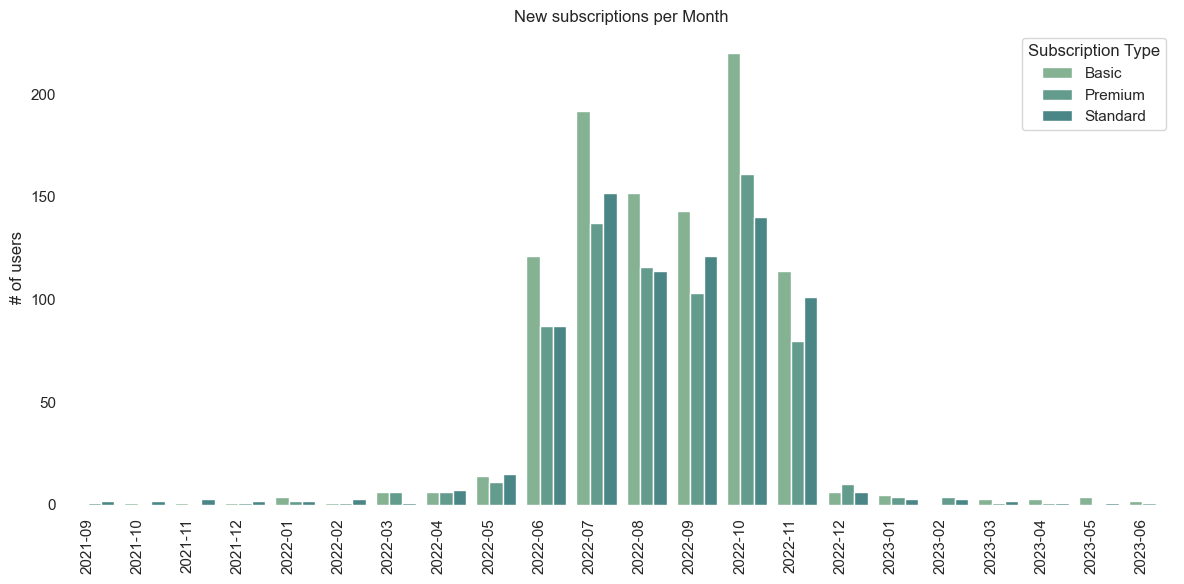

In [267]:
fig, ax= plt.subplots(figsize=(12,6))
sns.countplot(x='Join_Month', data=netflix, hue='Subscription Type', 
              order=netflix.groupby('Join_Month')['Join_Month'].max().sort_values(ascending=True))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
ax.set_ylabel('# of users')
ax.set_title('New subscriptions per Month')
ax.set_xlabel(None)

sns.despine(fig=fig, left=True, bottom=True)
plt.tight_layout()
plt.show()

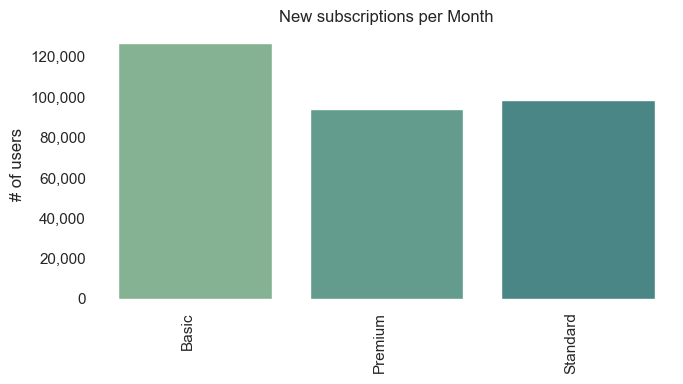

In [273]:
fig, ax= plt.subplots(figsize=(7,4))
sns.barplot(x='Subscription Type', y='ltv', data=netflix, estimator='sum', errorbar=None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
ax.yaxis.set_major_formatter('{x:,.0f}')
ax.set_ylabel('# of users')
ax.set_title('New subscriptions per Month')
ax.set_xlabel(None)

sns.despine(fig=fig, left=True, bottom=True)
plt.tight_layout()
plt.show()

### Conclusions

After all, some conclusions can be made on this data. First, most of clients come from USA, Spain and Canada. The gender is almost the same in terms of users, though women is more important in regard to revenue.

In terms of age, the biggest number of users is between 31 to 50 years. However, the users below 30 and 40 to 50 range is more important to the monthly revenue.

Finally, as we can see, there is a high volume of subscription one year ago from last point of data in this dataframe, that extends for 6 months (from `2022-06` to `2022-11`). After this peak all other months was very low. Probably some campaign occured at that moment.

If we look at the types of subscriptions, at any moment of these peaks, most of them were Basic plans. A new user is more prone to choice a basic subscription over others. It will probably indicates that this kind of subscription is more important than others to the total revenue.